# EDA


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.impute import SimpleImputer


try:
    df = pd.read_csv("data/train.csv")
    print("Successfully loaded train.csv")
except FileNotFoundError:
    print("Error: train.csv not found.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")
    exit()

Successfully loaded train.csv


## Dataset Overview

In [15]:
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()

print(f"\n--- DataFrame Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print('\n--- Columns ---')
print(df.columns.tolist())
print('\n--- Unique counts  ---')
print(df.nunique().sort_values(ascending=False))

cols = [
    "founder_role",
    "education_background",
    "work_life_balance_rating",
    "venture_satisfaction",
    "startup_reputation",
    "startup_performance_rating",
    "founder_visibility",
    "personal_status",
    "team_size_category",
    "startup_stage",
    "founder_gender",
    "working_overtime",
    "leadership_scope",
    "remote_operations",
    "innovation_support",
    "retention_status"
]

for col in cols:
    print(f"\n {col} : Unique Values ")
    print(df[col].dropna().unique())




--- First 5 Rows ---
   founder_id  founder_age founder_gender  years_with_startup founder_role  \
0        8410           31           Male                  19    Education   
1       64756           59         Female                   4        Media   
2       30257           24         Female                  10   Healthcare   
3       65791           36         Female                   7    Education   
4       65026           56           Male                  41    Education   

   monthly_revenue_generated work_life_balance_rating venture_satisfaction  \
0                     5390.0                Excellent               Medium   
1                     5534.0                     Poor                 High   
2                     8159.0                     Good                 High   
3                     3989.0                     Good                 High   
4                     4821.0                      NaN                  NaN   

  startup_performance_rating  funding_ro

##  Feature Statistics

In [16]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
founder_id,59611.0,NaN,NaN,NaN,37224.692171,21519.598309,1.0,18576.0,37207.0,55874.5,74498.0
founder_age,59611.0,NaN,NaN,NaN,38.562497,12.0825,6.0,28.0,39.0,49.0,59.0
founder_gender,59611,2,Male,32747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_with_startup,59611.0,NaN,NaN,NaN,15.75263,11.245724,1.0,7.0,13.0,23.0,51.0
founder_role,59611,5,Technology,15509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_revenue_generated,57811.0,NaN,NaN,NaN,7311.07035,2197.444033,1316.0,5661.0,7358.0,8882.0,56050.0
work_life_balance_rating,49467,4,Good,18755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
venture_satisfaction,52447,4,High,26255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startup_performance_rating,59611,4,Average,35818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funding_rounds_led,59611.0,NaN,NaN,NaN,0.832514,0.994987,0.0,0.0,1.0,2.0,4.0


## 3. Missing Values & Patterns

,missing_count,missing_pct
work_life_balance_rating,10144,17.016994
venture_satisfaction,7164,12.017916
num_dependents,4780,8.018654
years_since_founding,4184,7.018839
team_size_category,2992,5.019208
monthly_revenue_generated,1800,3.019577


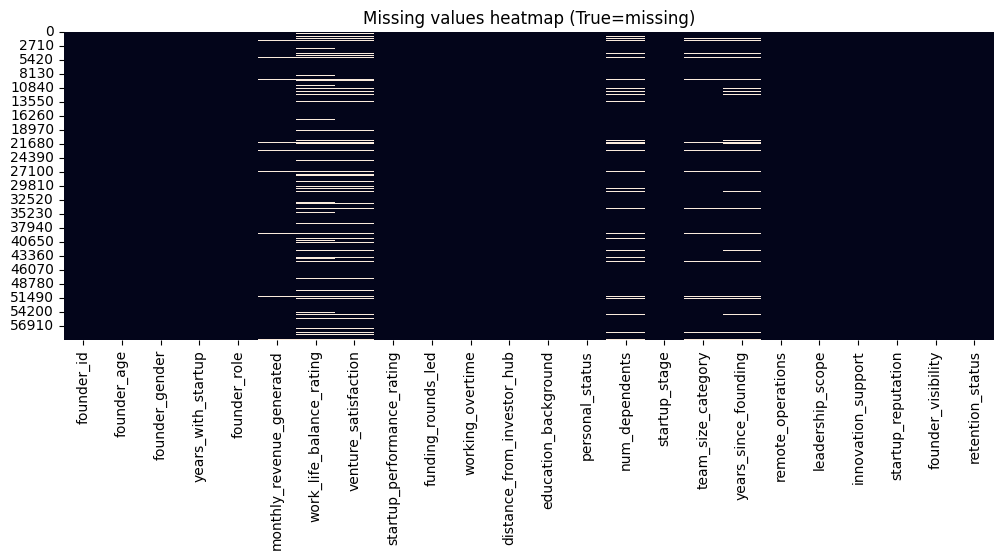

In [17]:
mv = pd.DataFrame({'missing_count': df.isnull().sum(), 'missing_pct': df.isnull().mean()*100})
display(mv[mv['missing_count']>0].sort_values('missing_pct', ascending=False))

plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values heatmap (True=missing)')
plt.show()

### 3.1 Missingness correlation (which columns miss together)

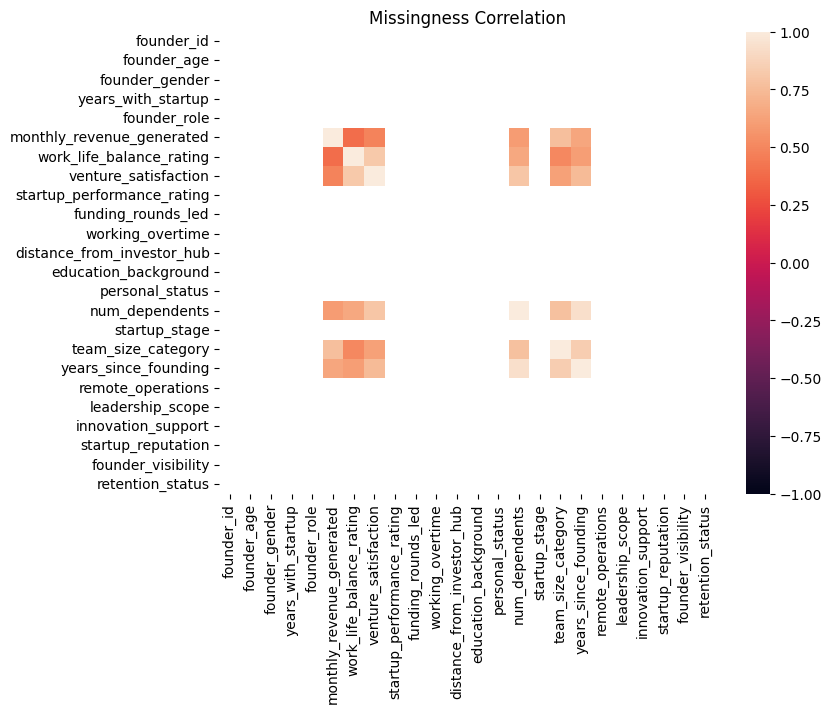

In [18]:
if df.isnull().sum().sum()>0:
    miss_corr = df.isnull().corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(miss_corr, annot=False, vmax=1, vmin=-1)
    plt.title('Missingness Correlation')
    plt.show()
else:
    print('No missing values found.')

## Duplicates & Constant Columns Checker

In [19]:
num_duplicates = df.duplicated().sum()
print('Duplicate rows:', df.duplicated().sum())


const_cols = [c for c in df.columns if df[c].nunique(dropna=False)<=1]
print('Constant columns:', const_cols)
# here we have no constant columns

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Dropped {num_duplicates} duplicate rows.")
    print(f"New DataFrame Shape: Rows: {df.shape[0]}, Columns: {df.shape[1]}")
else:
    print("No duplicate rows found.")


Duplicate rows: 13
Constant columns: []
Dropped 13 duplicate rows.
New DataFrame Shape: Rows: 59598, Columns: 24


## Analysis of Numerical columns

Numerical columns: ['founder_id', 'founder_age', 'years_with_startup', 'monthly_revenue_generated', 'funding_rounds_led', 'distance_from_investor_hub', 'num_dependents', 'years_since_founding']


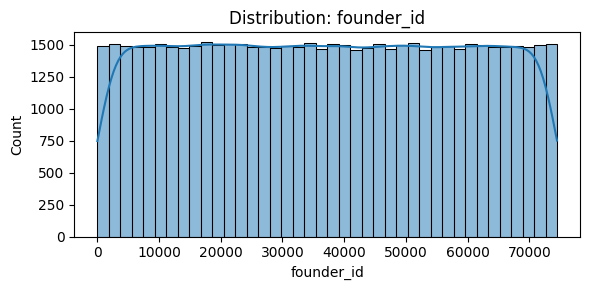

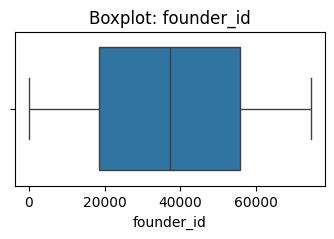

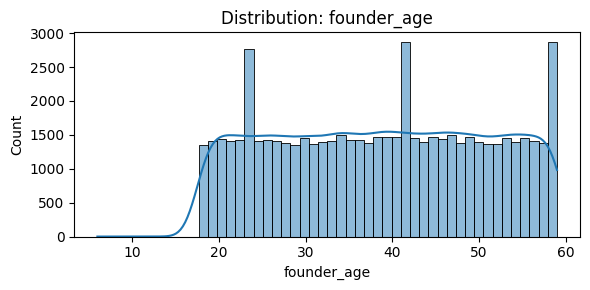

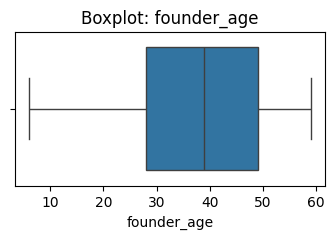

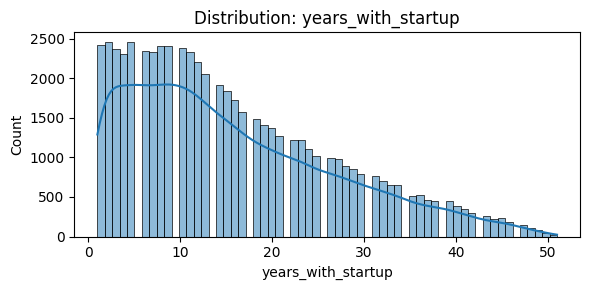

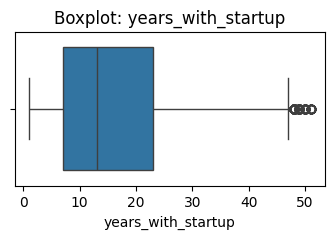

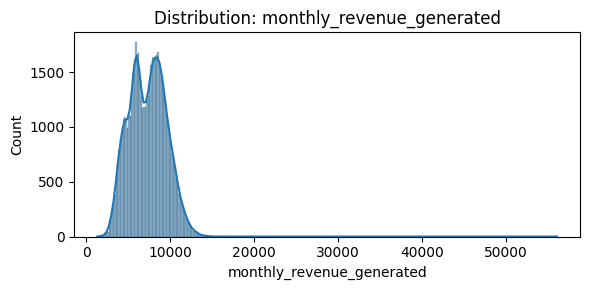

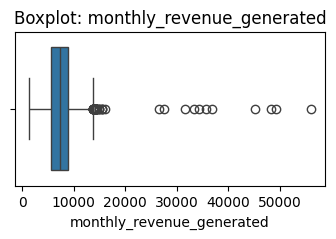

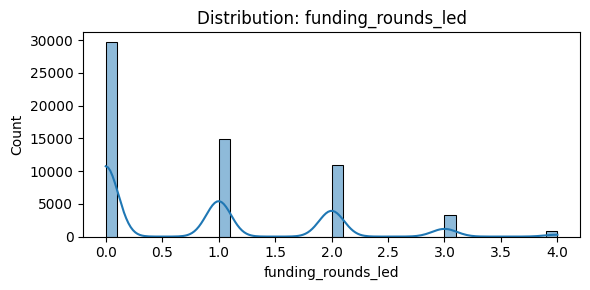

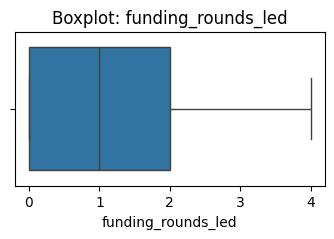

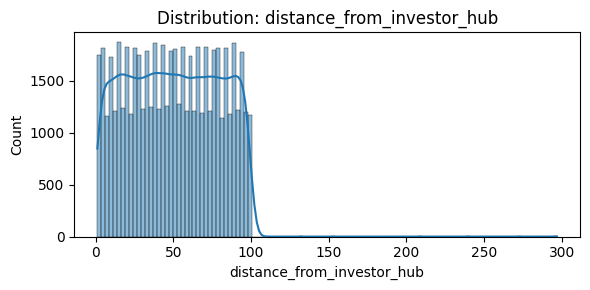

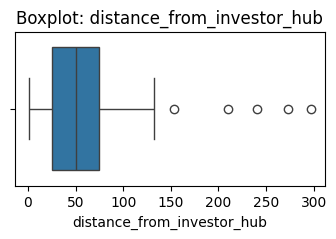

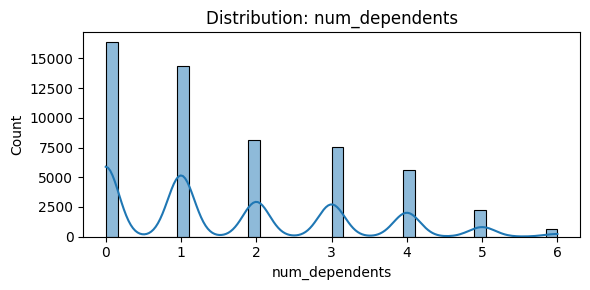

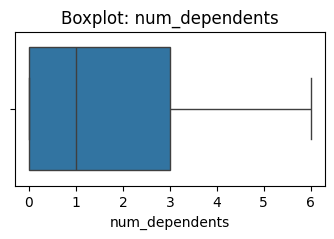

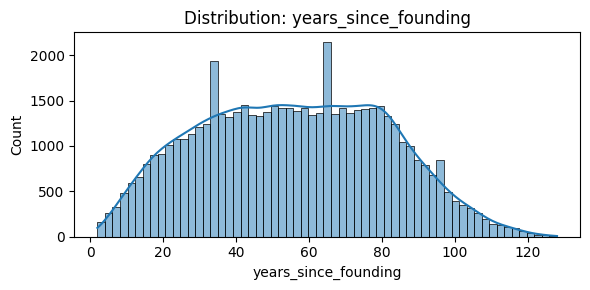

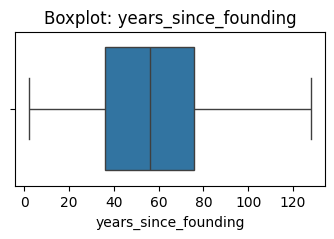

In [20]:
num_cols = df.select_dtypes(include='number').columns.tolist()
print('Numerical columns:', num_cols)

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution: {col}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot: {col}')
    plt.show()

## Analysis of Categorical Columns

Categorical columns: ['founder_gender', 'founder_role', 'work_life_balance_rating', 'venture_satisfaction', 'startup_performance_rating', 'working_overtime', 'education_background', 'personal_status', 'startup_stage', 'team_size_category', 'remote_operations', 'leadership_scope', 'innovation_support', 'startup_reputation', 'founder_visibility', 'retention_status']

--- founder_gender ---


founder_gender
Male      32739
Female    26859
Name: count, dtype: int64

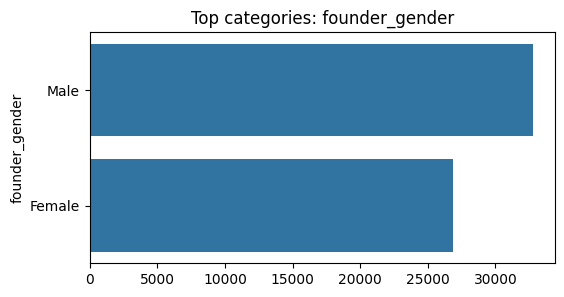


--- founder_role ---


founder_role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64

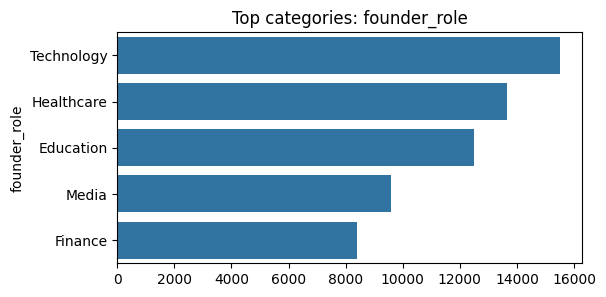


--- work_life_balance_rating ---


work_life_balance_rating
Good         18755
Fair         14972
Excellent     8851
Poor          6889
Name: count, dtype: int64

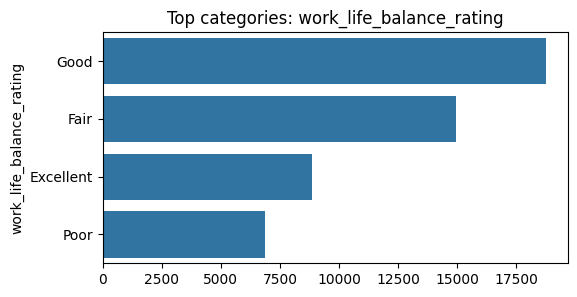


--- venture_satisfaction ---


venture_satisfaction
High         26255
Very High    10609
Medium       10416
Low           5167
Name: count, dtype: int64

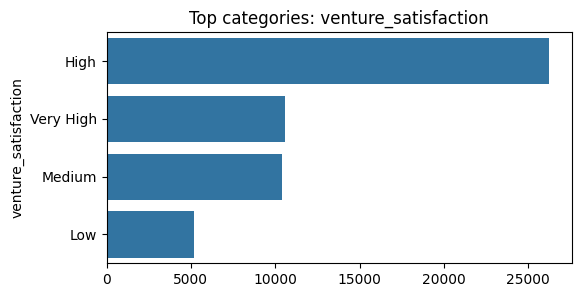


--- startup_performance_rating ---


startup_performance_rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64

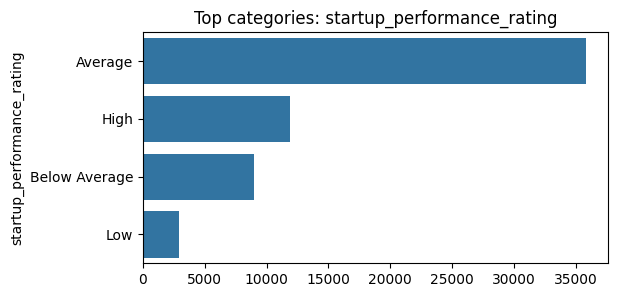


--- working_overtime ---


working_overtime
No     40148
Yes    19450
Name: count, dtype: int64

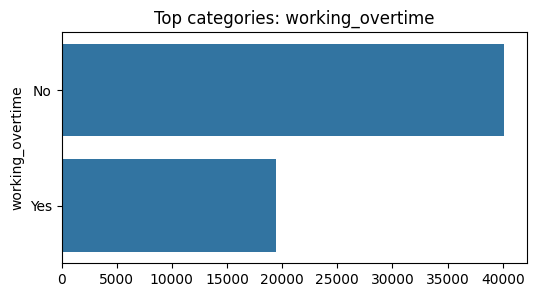


--- education_background ---


education_background
Bachelor’s Degree    17826
Associate Degree     14915
Master’s Degree      12020
High School          11748
PhD                   3089
Name: count, dtype: int64

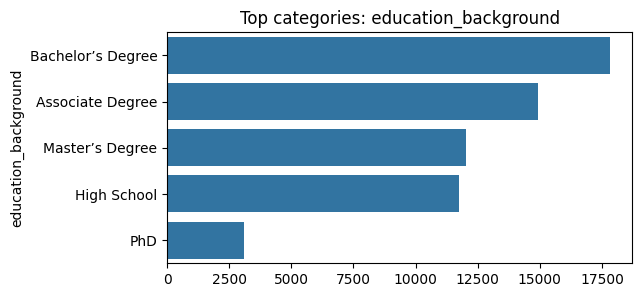


--- personal_status ---


personal_status
Married     29908
Single      20835
Divorced     8855
Name: count, dtype: int64

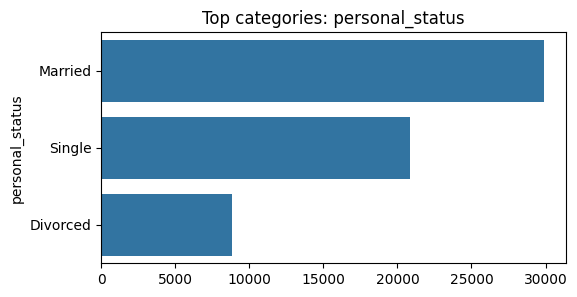


--- startup_stage ---


startup_stage
Entry     23867
Mid       23753
Senior    11978
Name: count, dtype: int64

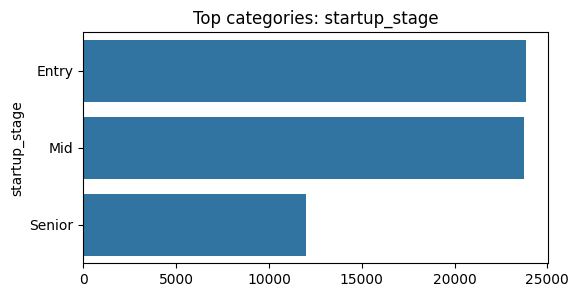


--- team_size_category ---


team_size_category
Medium    28259
Small     17034
Large     11326
Name: count, dtype: int64

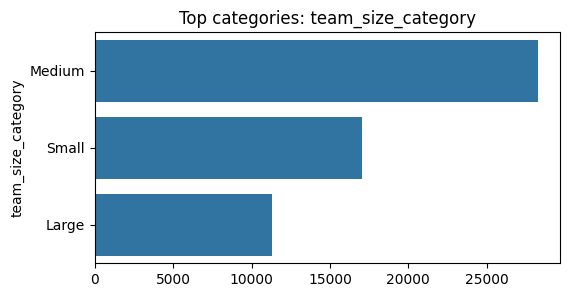


--- remote_operations ---


remote_operations
No     48239
Yes    11359
Name: count, dtype: int64

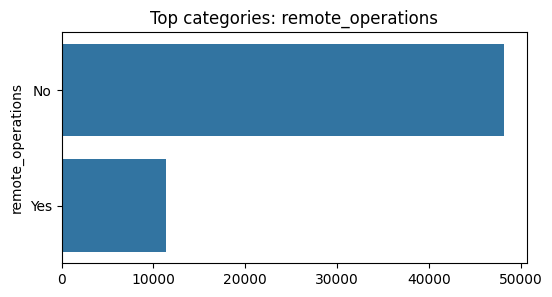


--- leadership_scope ---


leadership_scope
No     56680
Yes     2918
Name: count, dtype: int64

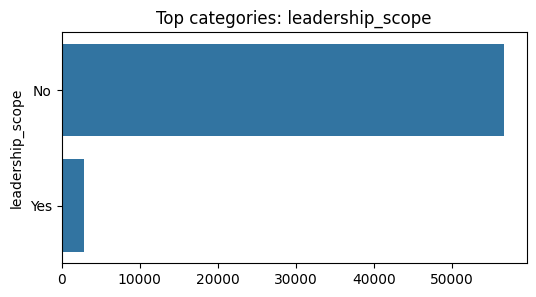


--- innovation_support ---


innovation_support
No     49895
Yes     9703
Name: count, dtype: int64

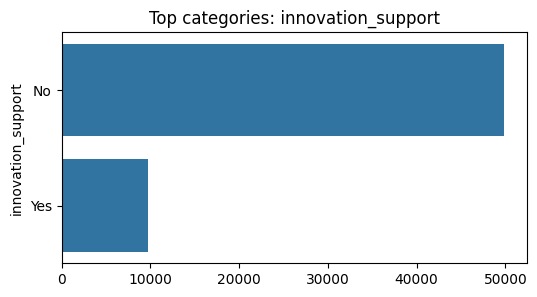


--- startup_reputation ---


startup_reputation
Good         29766
Poor         12034
Fair         11817
Excellent     5981
Name: count, dtype: int64

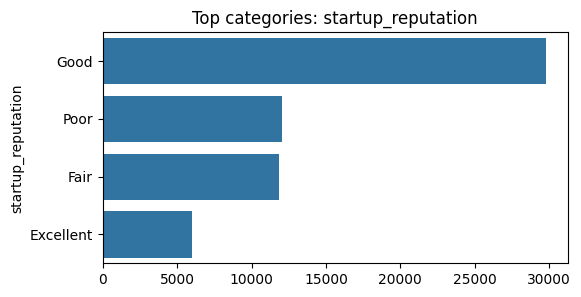


--- founder_visibility ---


founder_visibility
Low          23758
Medium       18033
High         14844
Very High     2963
Name: count, dtype: int64

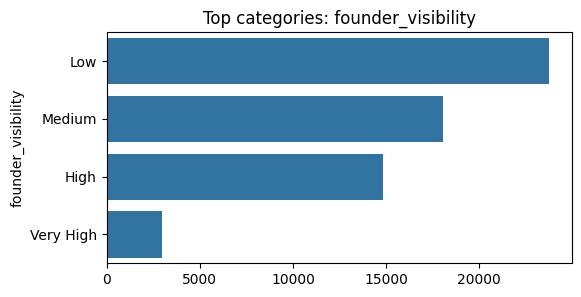


--- retention_status ---


retention_status
Stayed    31260
Left      28338
Name: count, dtype: int64

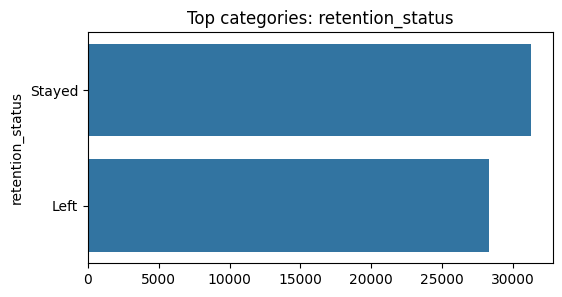

In [24]:
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
print('Categorical columns:', cat_cols)

for col in cat_cols:
    vc = df[col].value_counts(dropna=True).head(20)# change it to True or False as needed
    print('\n---', col, '---')
    display(vc)
    plt.figure(figsize=(6,3))
    sns.barplot(y=vc.index.astype(str), x=vc.values)
    plt.title(f'Top categories: {col}')
    plt.show()

## Bivariate Analysis

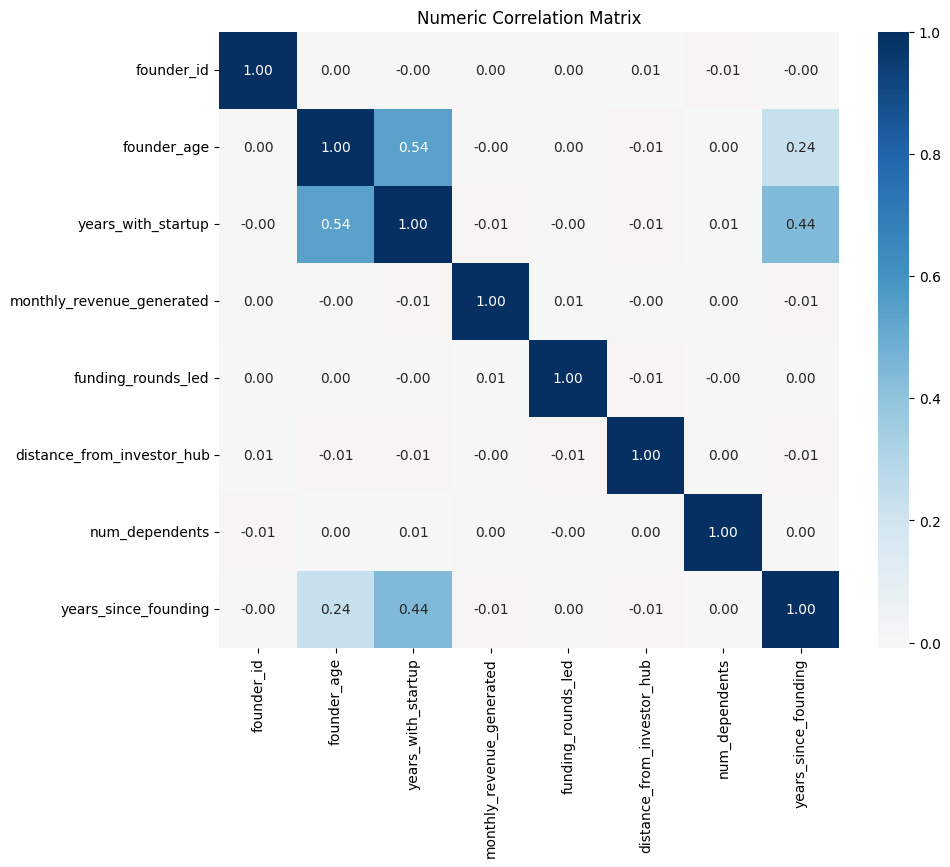

In [22]:
if len(num_cols)>=2:
    plt.figure(figsize=(10,8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu', center=0)
    plt.title('Numeric Correlation Matrix')
    plt.show()
else:
    print('Not enough numeric columns for correlation matrix.')

In [23]:
if len(num_cols)>=2:
    corr_abs = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
    top_corr = corr_abs[corr_abs<1].head(20)
    display(top_corr)


founder_age                 years_with_startup            0.539709
years_with_startup          years_since_founding          0.441013
years_since_founding        founder_age                   0.235137
founder_id                  distance_from_investor_hub    0.008942
funding_rounds_led          distance_from_investor_hub    0.008008
distance_from_investor_hub  years_since_founding          0.007509
                            years_with_startup            0.007174
founder_age                 distance_from_investor_hub    0.007093
years_since_founding        monthly_revenue_generated     0.007076
monthly_revenue_generated   funding_rounds_led            0.006787
                            years_with_startup            0.005899
num_dependents              founder_id                    0.005546
                            years_with_startup            0.005424
founder_id                  funding_rounds_led            0.004362
num_dependents              founder_age                   0.00

## 8. Outlier Detection (IQR & Z-score)

In [17]:
outlier_summary = []
for col in num_cols:
    series = df[col].dropna()
    if series.shape[0]==0:
        continue
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    iqr_out = ((series<lower)|(series>upper)).sum()
    z_out = (np.abs((series - series.mean())/series.std())>3).sum() if series.std()>0 else 0
    outlier_summary.append((col, int(iqr_out), int(z_out)))

out_df = pd.DataFrame(outlier_summary, columns=['column','iqr_outliers','z_outliers']).sort_values('iqr_outliers', ascending=False)
display(out_df)

,column,iqr_outliers,z_outliers
2,years_with_startup,273,75
3,monthly_revenue_generated,59,48
5,distance_from_investor_hub,5,5
1,founder_age,0,0
0,founder_id,0,0
4,funding_rounds_led,0,788
6,num_dependents,0,0
7,years_since_founding,0,0


# Missing values Imputations

In [25]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

num_impute = {col: df[col].median() for col in num_cols}

for col, val in num_impute.items():
    df[col] = df[col].fillna(val)

cat_impute = {}

for col in cat_cols:
    mode = df[col].mode()
    cat_impute[col] = mode.iloc[0] if not mode.empty else "Missing"
    
    df[col] = df[col].fillna(cat_impute[col])

display(df.isna().sum()[df.isna().sum() > 0])



Numerical columns: ['founder_id', 'founder_age', 'years_with_startup', 'monthly_revenue_generated', 'funding_rounds_led', 'distance_from_investor_hub', 'num_dependents', 'years_since_founding']
Categorical columns: ['founder_gender', 'founder_role', 'work_life_balance_rating', 'venture_satisfaction', 'startup_performance_rating', 'working_overtime', 'education_background', 'personal_status', 'startup_stage', 'team_size_category', 'remote_operations', 'leadership_scope', 'innovation_support', 'startup_reputation', 'founder_visibility', 'retention_status']


Series([], dtype: int64)

In [27]:
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()

print(f"\n--- DataFrame Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print('\n--- Columns ---')
print(df.columns.tolist())
print('\n--- Unique counts  ---')
print(df.nunique().sort_values(ascending=False))

cols = [
    "founder_role",
    "education_background",
    "work_life_balance_rating",
    "venture_satisfaction",
    "startup_reputation",
    "startup_performance_rating",
    "founder_visibility",
    "personal_status",
    "team_size_category",
    "startup_stage",
    "founder_gender",
    "working_overtime",
    "leadership_scope",
    "remote_operations",
    "innovation_support",
    "retention_status"
]

for col in cols:
    print(f"\n {col} : Unique Values ")
    print(df[col].dropna().unique())




--- First 5 Rows ---
   founder_id  founder_age founder_gender  years_with_startup founder_role  \
0        8410           31           Male                  19    Education   
1       64756           59         Female                   4        Media   
2       30257           24         Female                  10   Healthcare   
3       65791           36         Female                   7    Education   
4       65026           56           Male                  41    Education   

   monthly_revenue_generated work_life_balance_rating venture_satisfaction  \
0                     5390.0                Excellent               Medium   
1                     5534.0                     Poor                 High   
2                     8159.0                     Good                 High   
3                     3989.0                     Good                 High   
4                     4821.0                     Good                 High   

  startup_performance_rating  funding_ro

In [26]:
display(df.describe(include="all").T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
founder_id,59598.0,NaN,NaN,NaN,37227.118729,21519.150028,1.0,18580.25,37209.5,55876.75,74498.0
founder_age,59598.0,NaN,NaN,NaN,38.563861,12.082156,6.0,28.0,39.0,49.0,59.0
founder_gender,59598,2,Male,32739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_with_startup,59598.0,NaN,NaN,NaN,15.753901,11.245981,1.0,7.0,13.0,23.0,51.0
founder_role,59598,5,Technology,15507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_revenue_generated,59598.0,NaN,NaN,NaN,7312.477499,2164.263214,1316.0,5705.0,7358.0,8835.0,56050.0
work_life_balance_rating,59598,4,Good,28886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
venture_satisfaction,59598,4,High,33406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startup_performance_rating,59598,4,Average,35810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funding_rounds_led,59598.0,NaN,NaN,NaN,0.832578,0.994991,0.0,0.0,1.0,2.0,4.0


Numerical columns: ['founder_id', 'founder_age', 'years_with_startup', 'monthly_revenue_generated', 'funding_rounds_led', 'distance_from_investor_hub', 'num_dependents', 'years_since_founding']


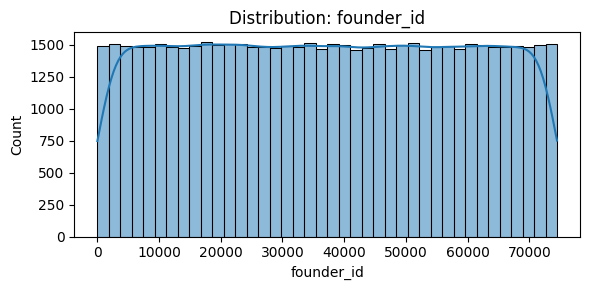

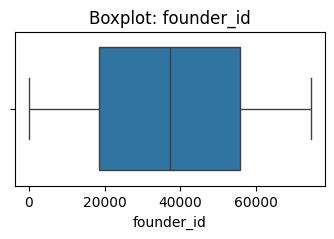

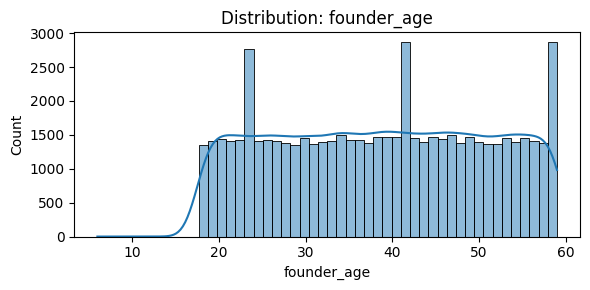

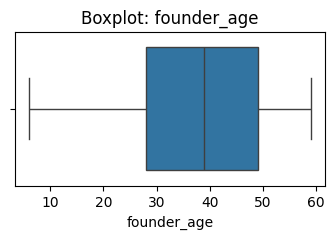

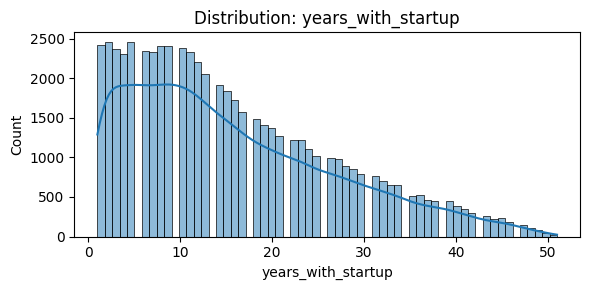

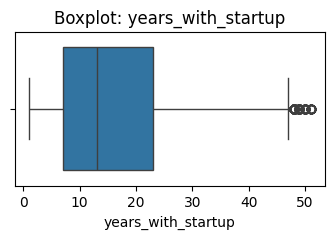

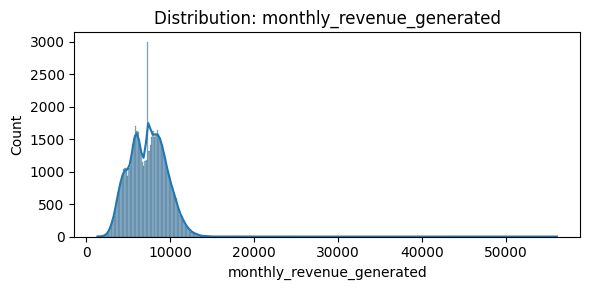

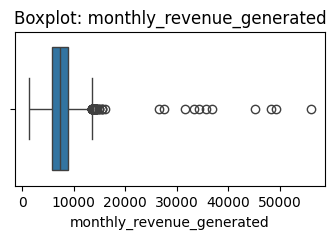

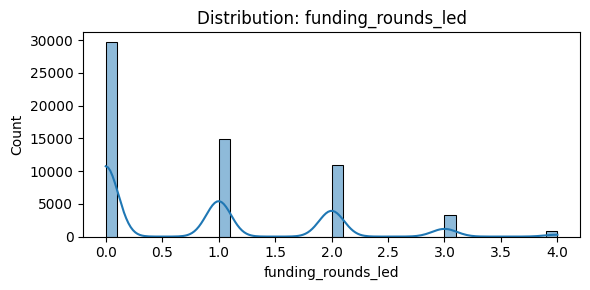

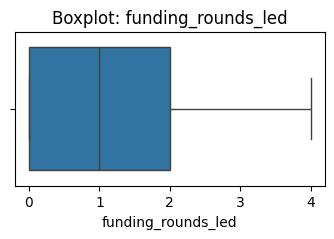

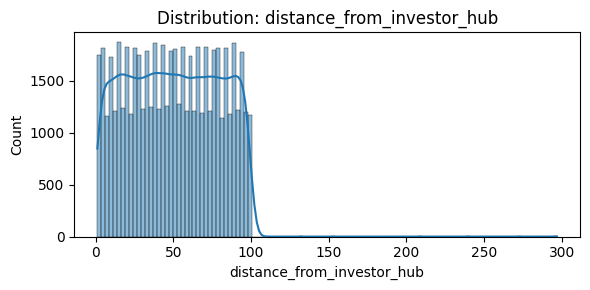

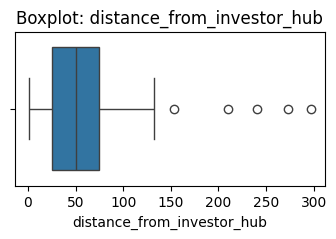

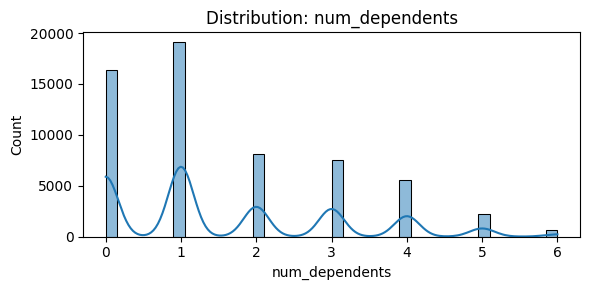

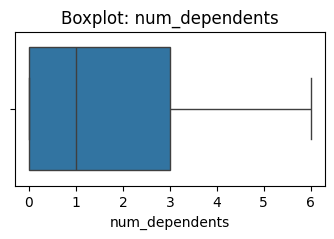

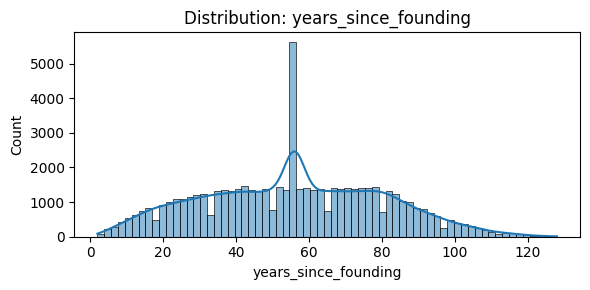

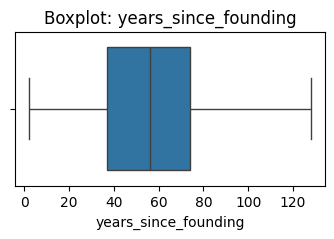

In [29]:
num_cols = df.select_dtypes(include='number').columns.tolist()
print('Numerical columns:', num_cols)

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution: {col}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot: {col}')
    plt.show()

Categorical columns: ['founder_gender', 'founder_role', 'work_life_balance_rating', 'venture_satisfaction', 'startup_performance_rating', 'working_overtime', 'education_background', 'personal_status', 'startup_stage', 'team_size_category', 'remote_operations', 'leadership_scope', 'innovation_support', 'startup_reputation', 'founder_visibility', 'retention_status']

--- founder_gender ---


founder_gender
Male      32739
Female    26859
Name: count, dtype: int64

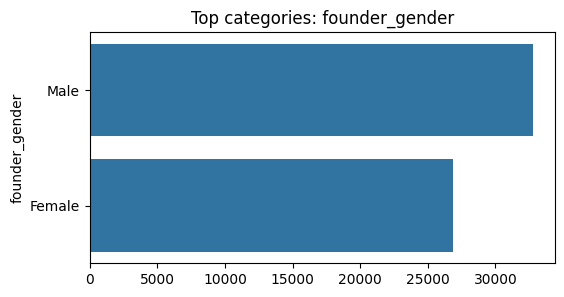


--- founder_role ---


founder_role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64

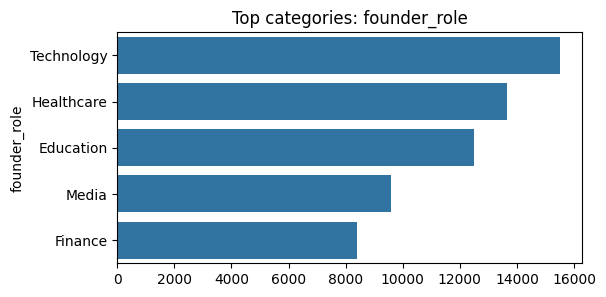


--- work_life_balance_rating ---


work_life_balance_rating
Good         28886
Fair         14972
Excellent     8851
Poor          6889
Name: count, dtype: int64

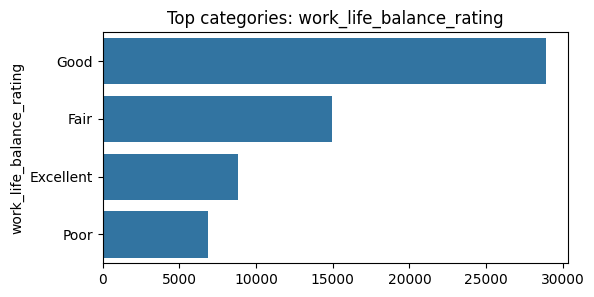


--- venture_satisfaction ---


venture_satisfaction
High         33406
Very High    10609
Medium       10416
Low           5167
Name: count, dtype: int64

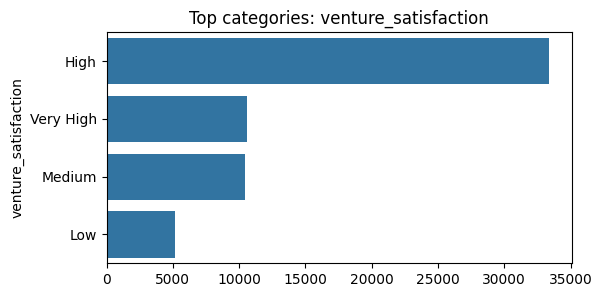


--- startup_performance_rating ---


startup_performance_rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64

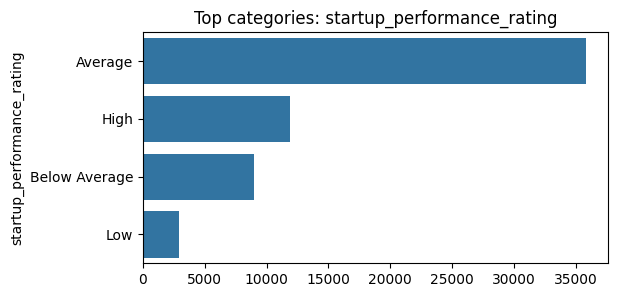


--- working_overtime ---


working_overtime
No     40148
Yes    19450
Name: count, dtype: int64

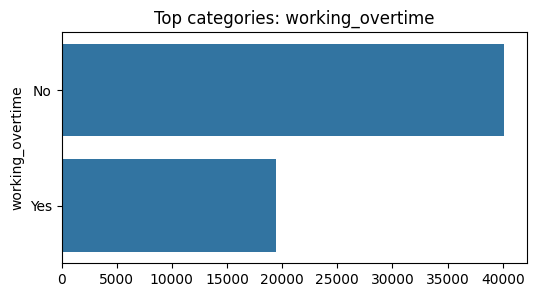


--- education_background ---


education_background
Bachelor’s Degree    17826
Associate Degree     14915
Master’s Degree      12020
High School          11748
PhD                   3089
Name: count, dtype: int64

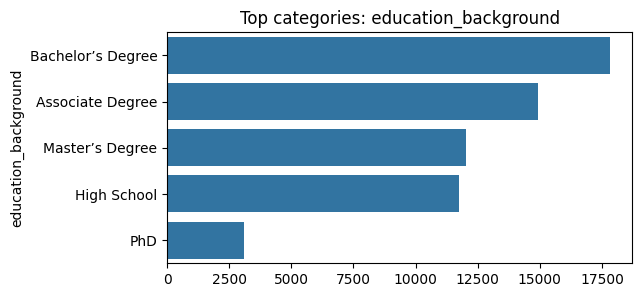


--- personal_status ---


personal_status
Married     29908
Single      20835
Divorced     8855
Name: count, dtype: int64

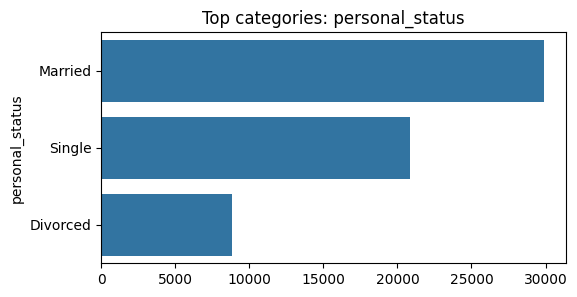


--- startup_stage ---


startup_stage
Entry     23867
Mid       23753
Senior    11978
Name: count, dtype: int64

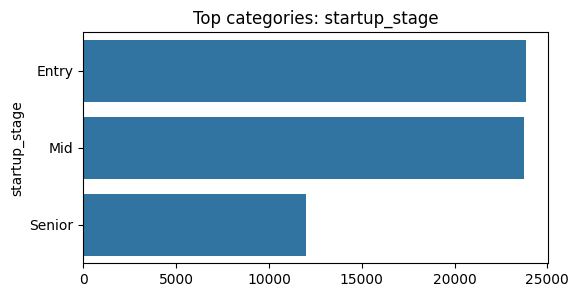


--- team_size_category ---


team_size_category
Medium    31238
Small     17034
Large     11326
Name: count, dtype: int64

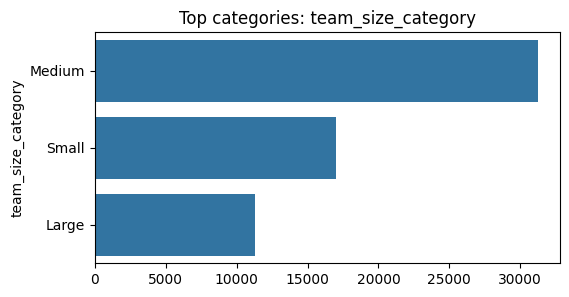


--- remote_operations ---


remote_operations
No     48239
Yes    11359
Name: count, dtype: int64

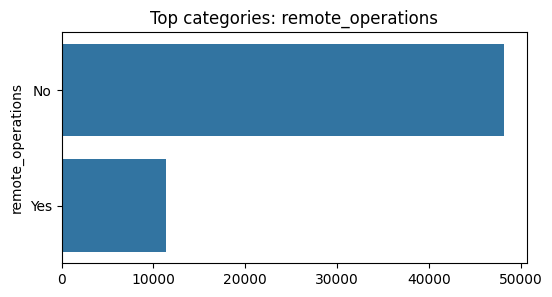


--- leadership_scope ---


leadership_scope
No     56680
Yes     2918
Name: count, dtype: int64

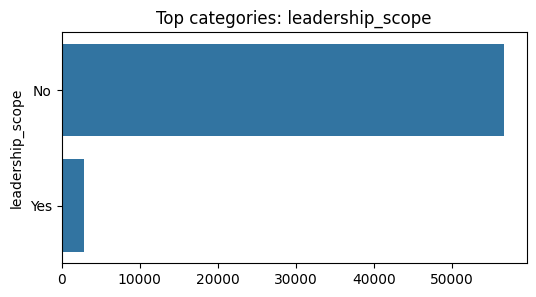


--- innovation_support ---


innovation_support
No     49895
Yes     9703
Name: count, dtype: int64

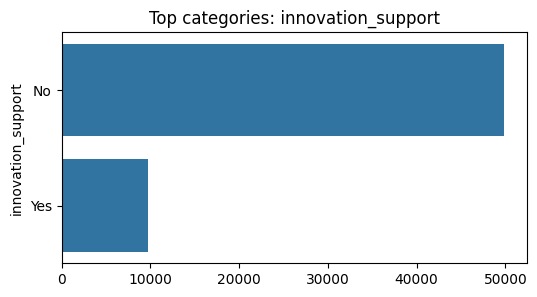


--- startup_reputation ---


startup_reputation
Good         29766
Poor         12034
Fair         11817
Excellent     5981
Name: count, dtype: int64

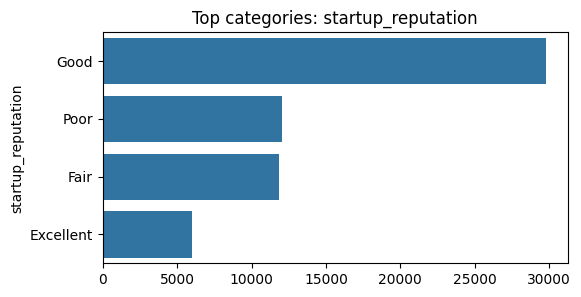


--- founder_visibility ---


founder_visibility
Low          23758
Medium       18033
High         14844
Very High     2963
Name: count, dtype: int64

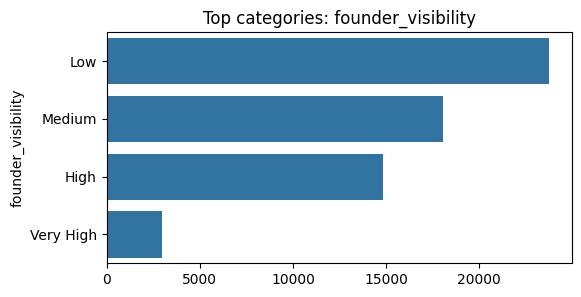


--- retention_status ---


retention_status
Stayed    31260
Left      28338
Name: count, dtype: int64

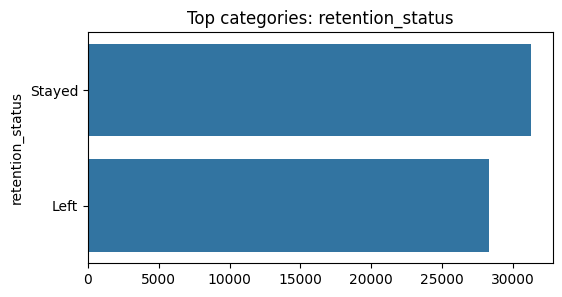

In [30]:
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
print('Categorical columns:', cat_cols)

for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(20)# change it to True or False as needed
    print('\n---', col, '---')
    display(vc)
    plt.figure(figsize=(6,3))
    sns.barplot(y=vc.index.astype(str), x=vc.values)
    plt.title(f'Top categories: {col}')
    plt.show()

# Target vs Features: Numerical

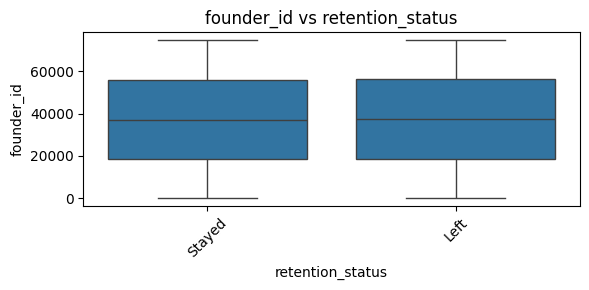

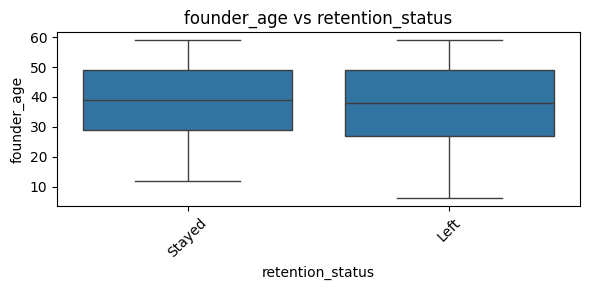

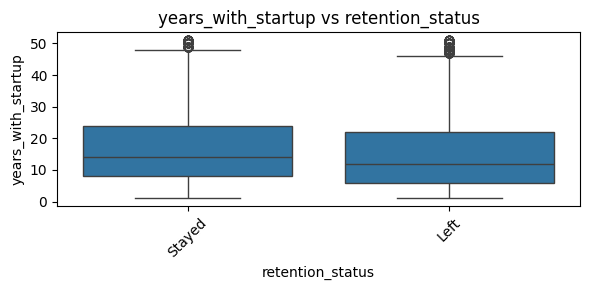

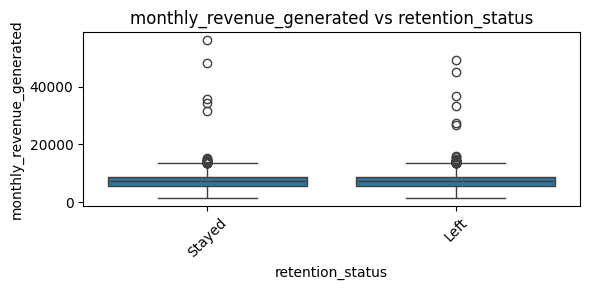

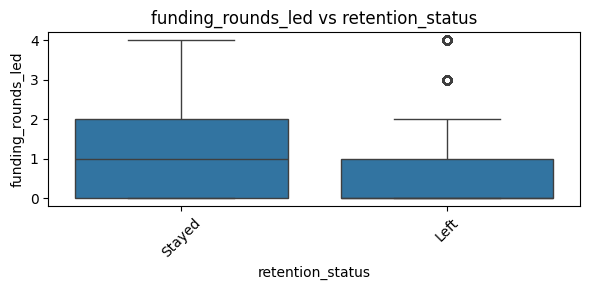

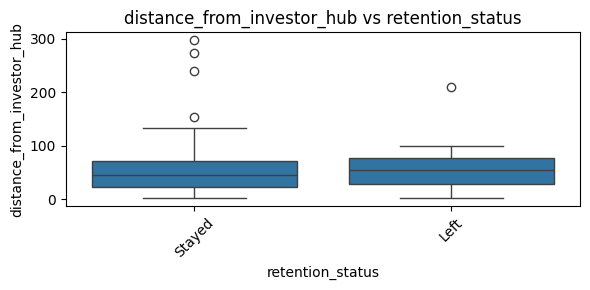

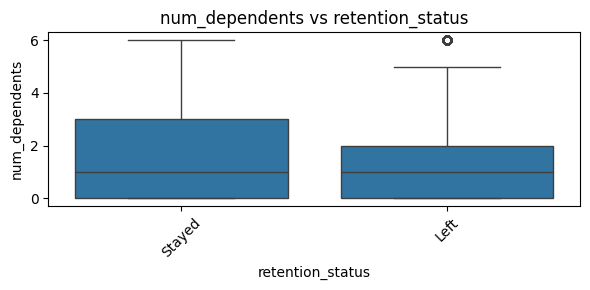

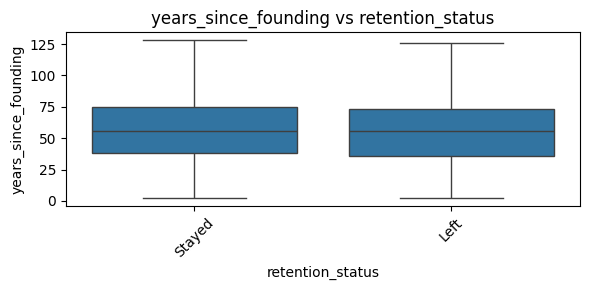

In [32]:
target = "retention_status"

for col in num_cols:
    if col == target:
        continue
        
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# Target vs Features: Categorical

<Figure size 700x300 with 0 Axes>

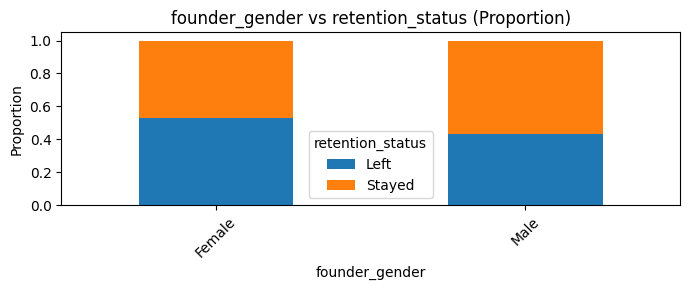

<Figure size 700x300 with 0 Axes>

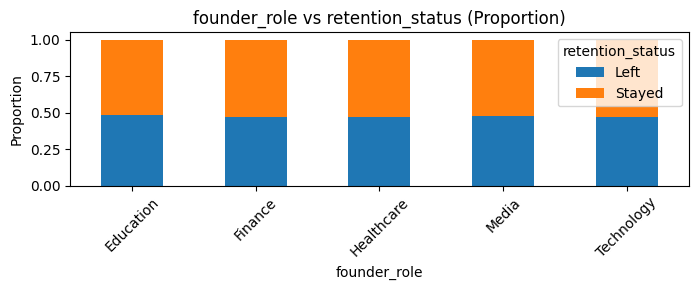

<Figure size 700x300 with 0 Axes>

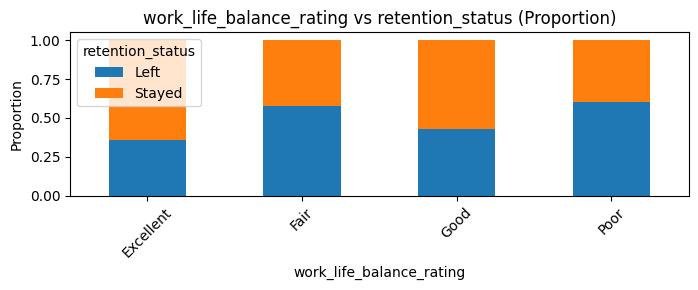

<Figure size 700x300 with 0 Axes>

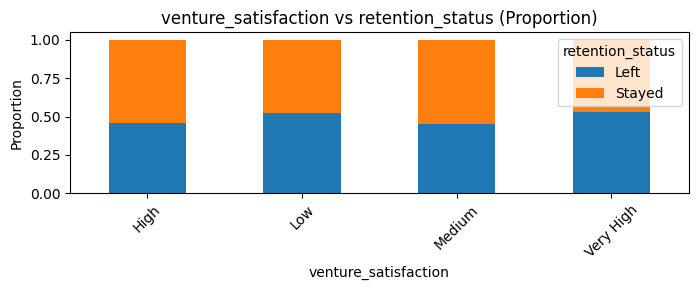

<Figure size 700x300 with 0 Axes>

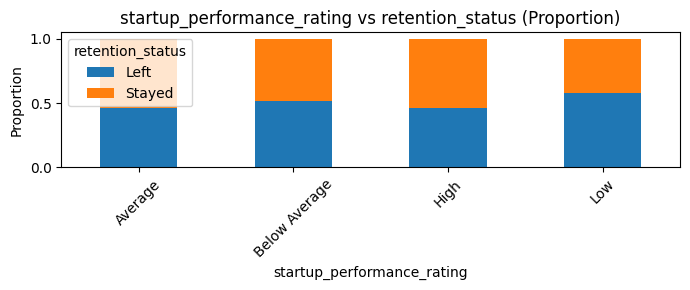

<Figure size 700x300 with 0 Axes>

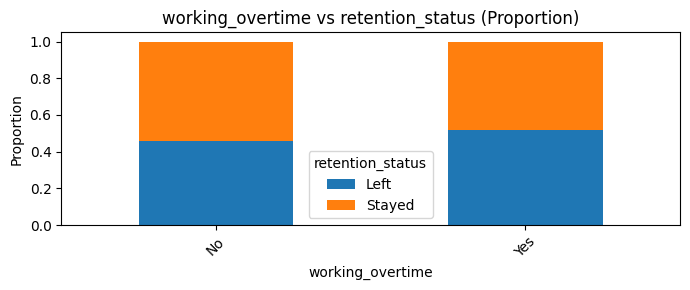

<Figure size 700x300 with 0 Axes>

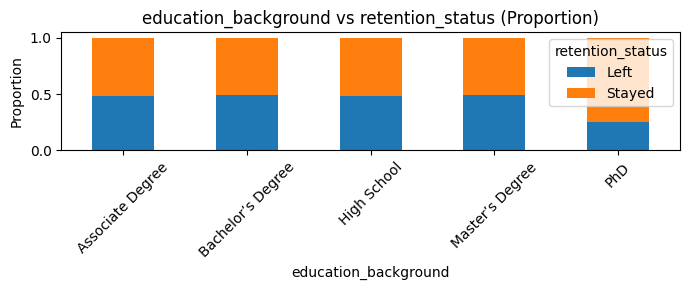

<Figure size 700x300 with 0 Axes>

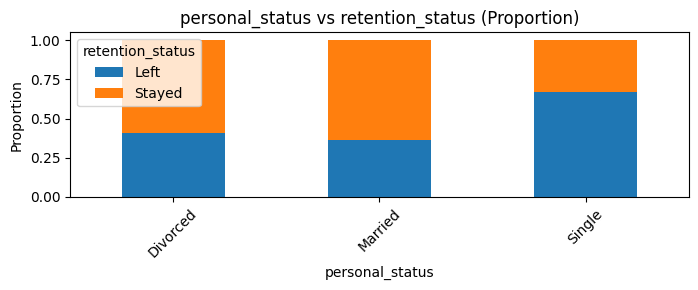

<Figure size 700x300 with 0 Axes>

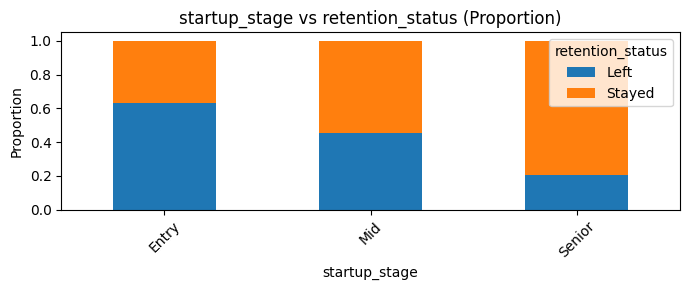

<Figure size 700x300 with 0 Axes>

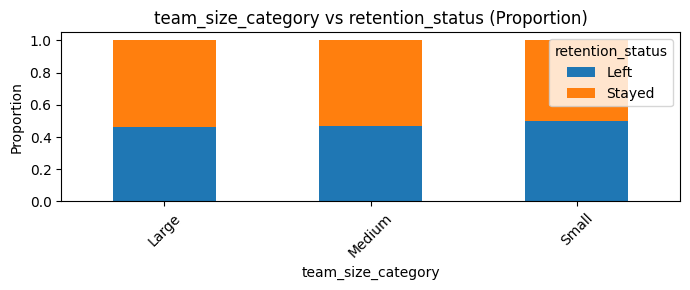

<Figure size 700x300 with 0 Axes>

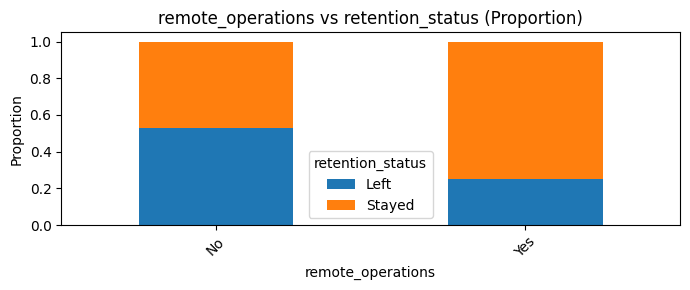

<Figure size 700x300 with 0 Axes>

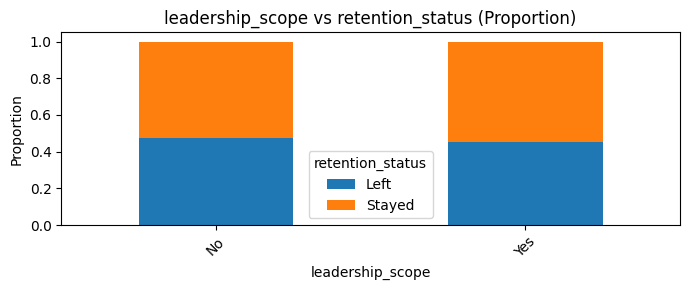

<Figure size 700x300 with 0 Axes>

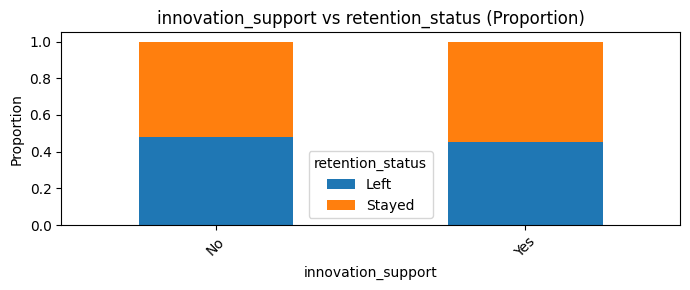

<Figure size 700x300 with 0 Axes>

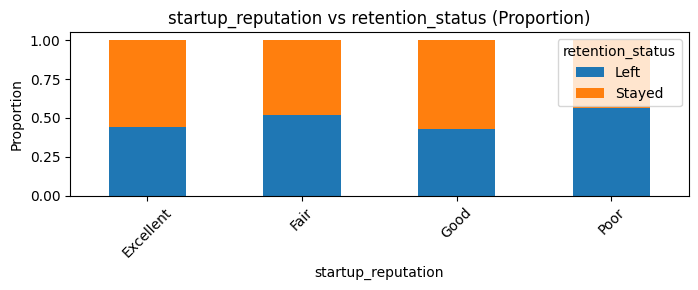

<Figure size 700x300 with 0 Axes>

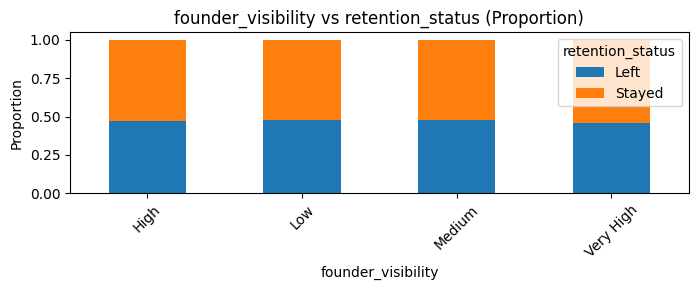

In [33]:
for col in cat_cols:
    if col == target:
        continue
        
    plt.figure(figsize=(7, 3))
    
    ct = pd.crosstab(df[col], df[target], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(7, 3))
    
    plt.title(f"{col} vs {target} (Proportion)")
    plt.ylabel("Proportion")
    plt.legend(title=target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [31]:
print("\n--- EDA Complete ---")


--- EDA Complete ---
